# Project 1: Data Analysis Unied States of America
## First: Prepare data

<a href = "https://simplemaps.com/data/us-zips"> <b>DOWNLOAD</b> </a> simplemap_us excel file</b> <br>
<br><b><i>Ways to copy excel file to sql server:</b></i>
1. SSMS import wizard : import flat file
2. Create SSIS package for ETL
3. Read Excel file from Python 

## Second: Clean Data
<b>Since one city in the Uited States can have multiple zipcodes, hence I need to split 1 zipcode for each row.
ways to transform data:</b><br>
1. Write custom SQL script.
2. Create SSIS packege to copy data from one table to another table after transform
3. Use Python:<br>
   &emsp; Load data from .csv to python dataframe<br>
   &emsp; Create Mapping Dictionary to map data type between Python object and SQL Server table<br>
   &emsp; Create SQL Server table in Python<br>
   &emsp; Import data from dataframe to another .csv file<br>
   &emsp; Load data from the .csv file to SQL Server table<br>
4. Use Power Query in Power BI Desktop   
    <br>Project 2: Analyze data using Power BI Desktop
Project 3: Read weather API to show weather in real time
Project 4: Get Stock real time
Project 5: Develop Excel form using Macro VBA
Skills show: SQL, SSIS, SSRS, Power BI, Python, API, data analysis, DAX, web design, html, css, javascript



# Get Data from https://simplemaps.com/data/us-zips

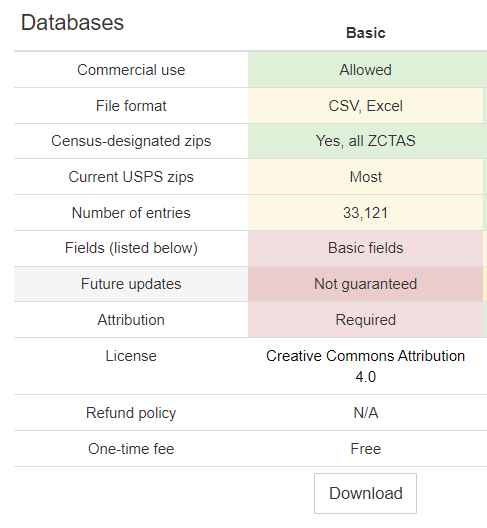

## Method 1: Import flat file to SQL Server: Right click Database -> Tasks -> Import Flat File
### Step 1: Get Data

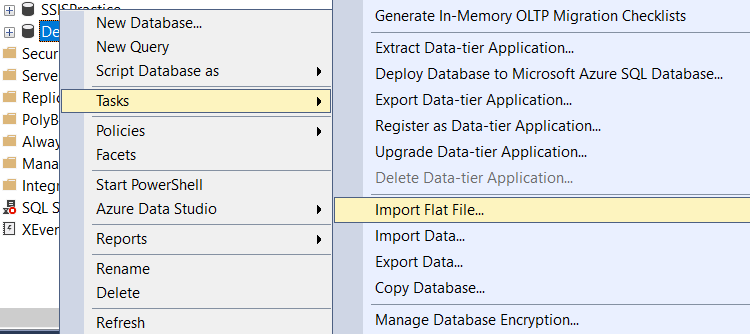

Next -> Browse CSV file

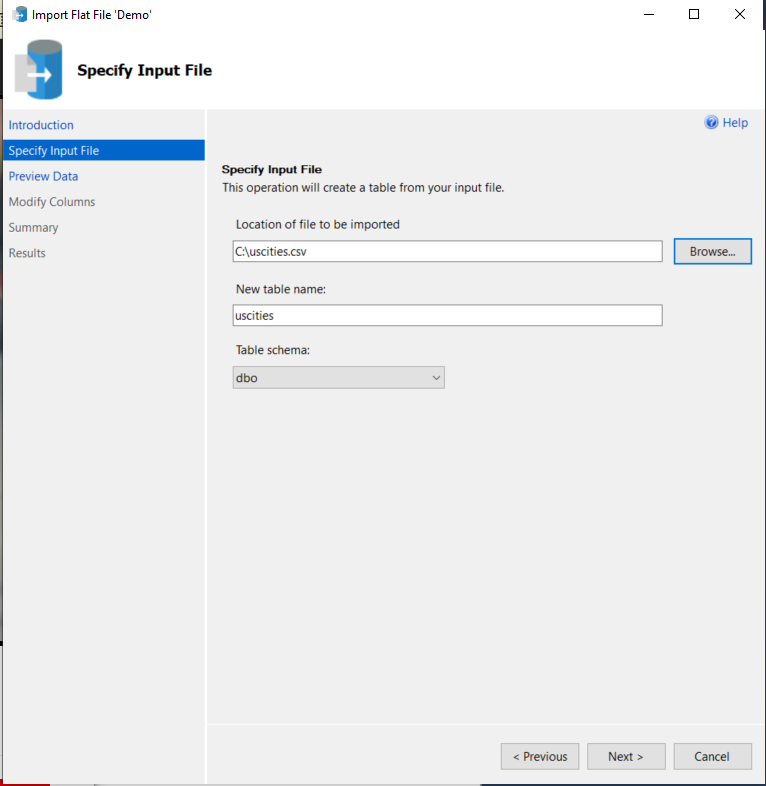

Next

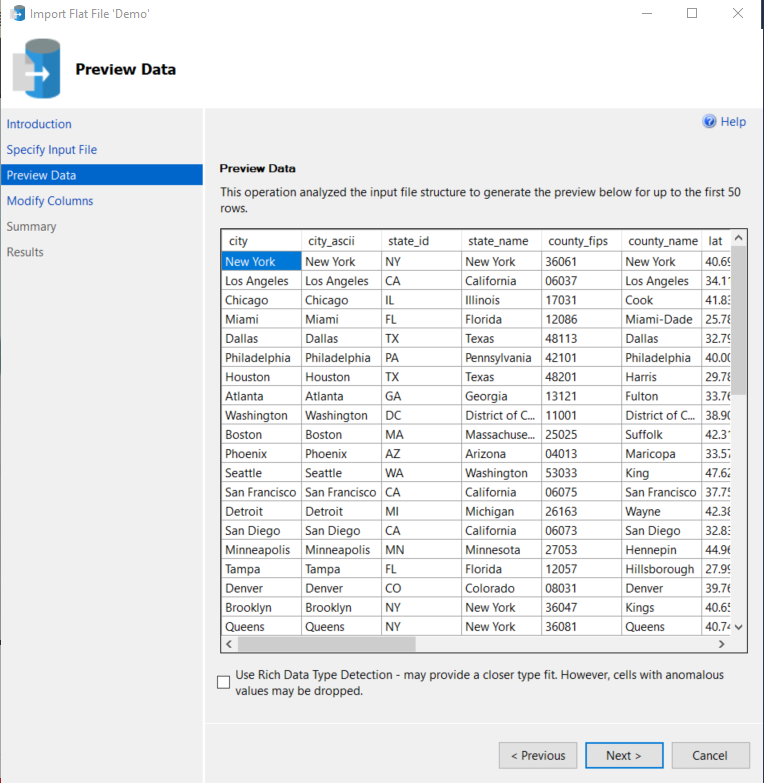

Next

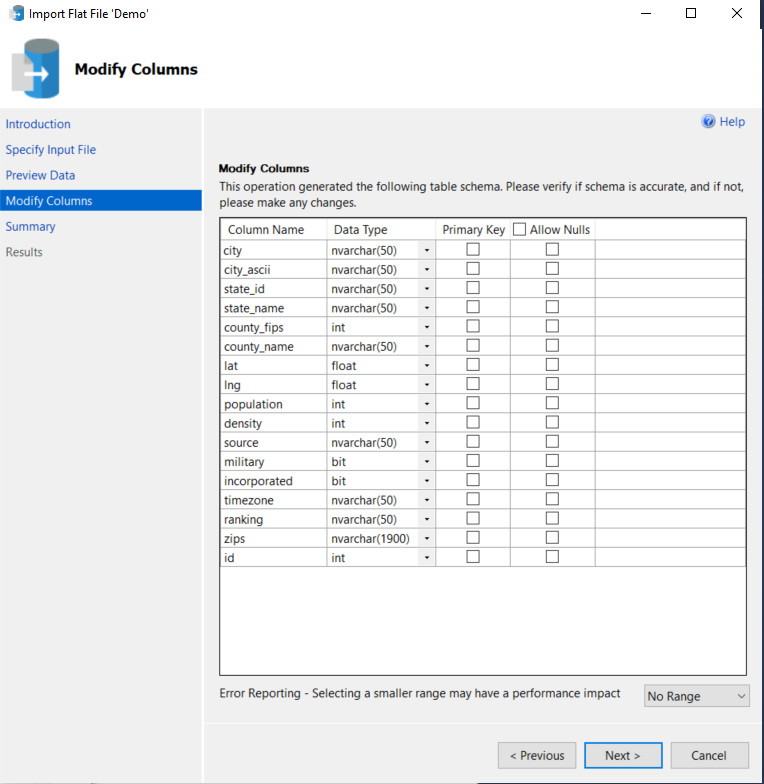

Next


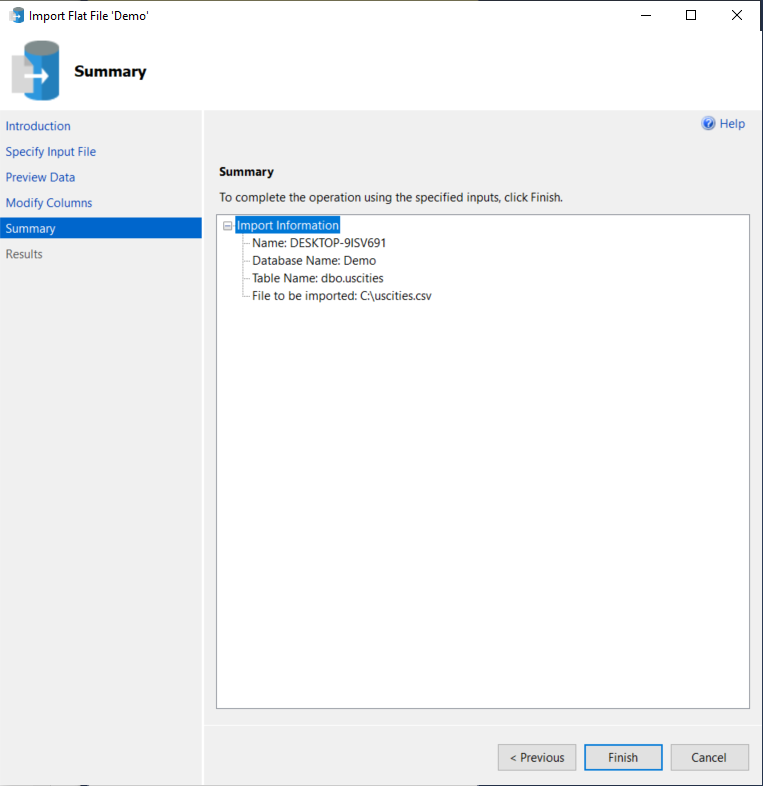

Finish

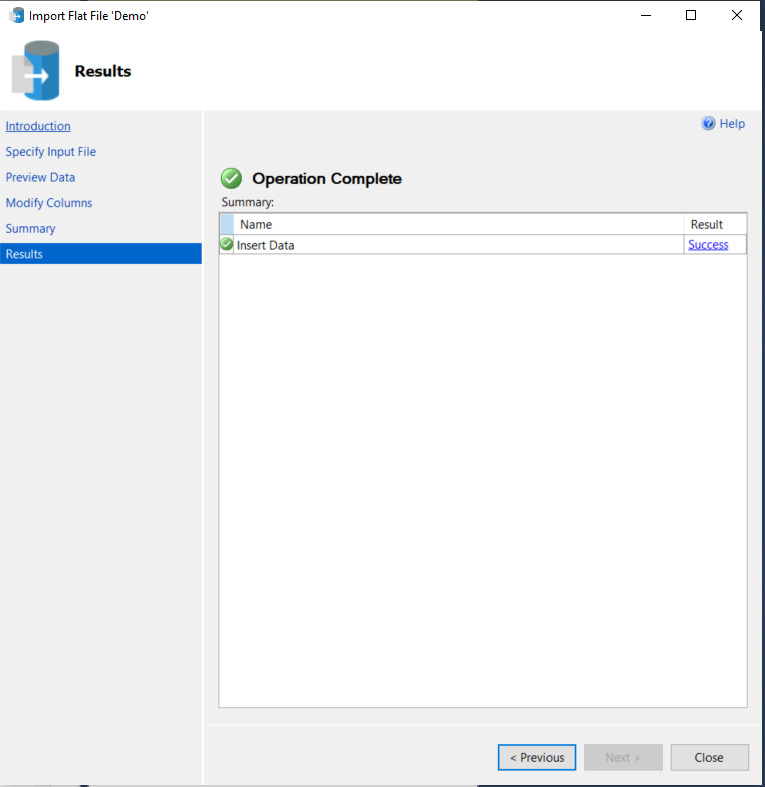

   ### Step 2: Clean Data <br> Copy data from ustities table to uscities_t after split multiples zips for each city with a 1 zipcode 

In [ ]:
SELECT [city]
,[city_ascii]
,[state_id]
,[state_name]
,[county_fips]
,[county_name]
,[lat]
,[lng]
,[population]
,[density]
,[source]
,[military]
,[incorporated]
,[timezone]
,[ranking]
,value as zipcode
,[id]
INTO [Demo].[dbo].[uscities_t]
FROM [Demo].[dbo].[uscities]
CROSS APPLY string_split(zips, ' ')

## Method 2: Using SSDT tool to create SSIS

### Step 1: Get Data: <br>Copy data from uscities excel file to us_map table in SQL Serever 
Excel Source: uscities.xlsx file <br>
OLE DB Destination: us_map table in SQL Server 

### Step 2: Clean Data: <br>Copy data from us_map table to us_map_t table in SQL Server after split multiple zips for each city with 1 zipcode 
OLE DB Source: us_map table in SQL Server <br>
OLE DB Destination: us_map_t table in SQL Server <br>

#### Load Sources to Datawarehouse
Execel Source: Import uscities.xlsx as Source<br>
OLE DB Destination: load the orginal Excel file to SQL Server(us_map table)<br>
#### Create DataMart from Datawarehouse
OLE DB Source: Extract uscities table from Datawarehouse in SQL Server(us_map table) <br>
OLE DB Destination 1: create a DataMart from Datawarehouse after splitting the zips (Transform data) and load the data from us_map table to us_map_t in SQL Server

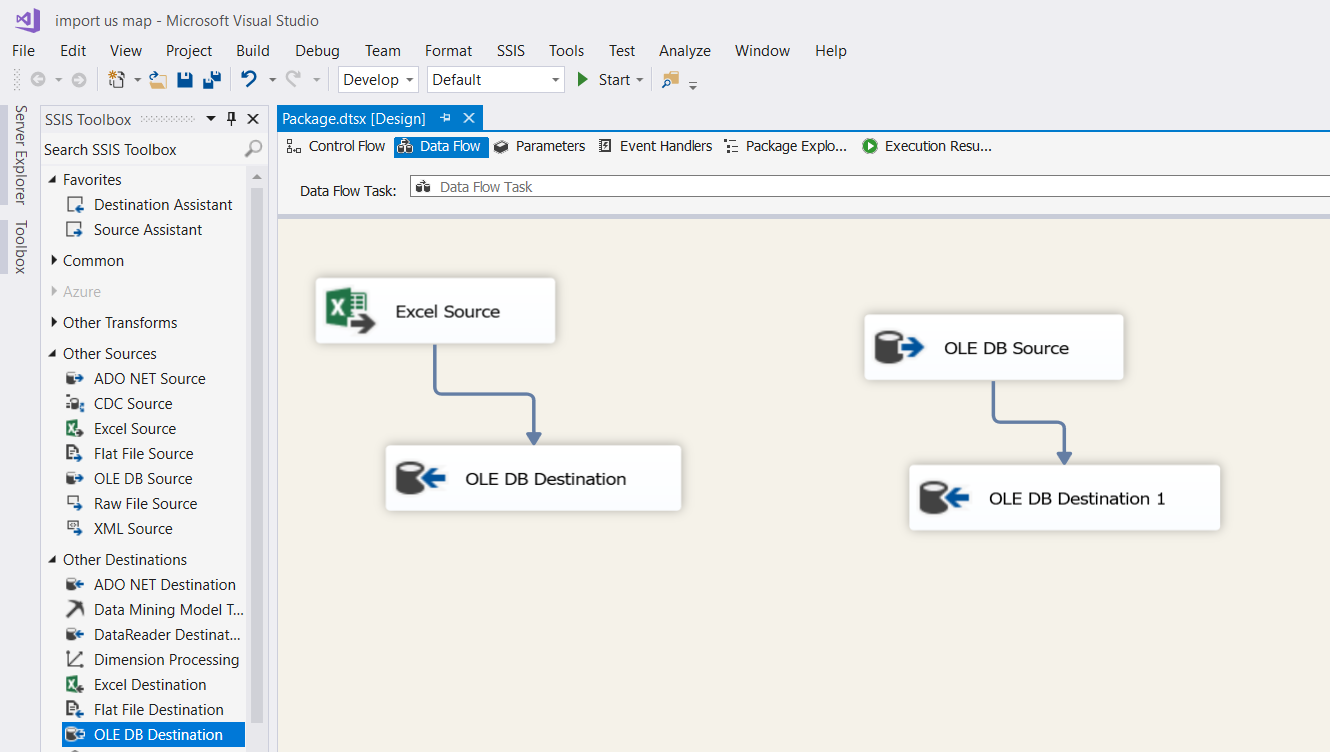

Run 

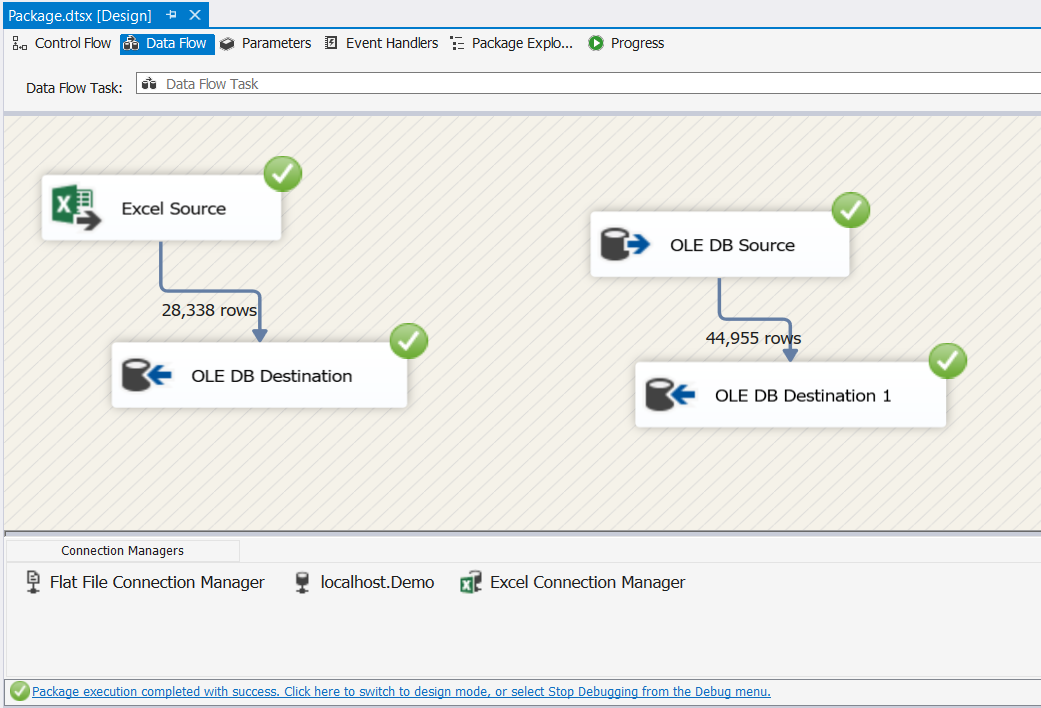

## Method 3: Get Data and Clean Data Python Script  

In [286]:
# Import libraries
import os
import numpy as np
import pandas as pd
import pyodbc

In [287]:
# Store csv file into pandas dataframe
dataframe = pd.read_csv("uscities.csv")
dataframe.head()

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,New York,New York,NY,New York,36061,New York,40.6943,-73.9249,18713220,10715,polygon,False,True,America/New_York,1,11229 11226 11225 11224 11222 11221 11220 1138...,1840034016
1,Los Angeles,Los Angeles,CA,California,6037,Los Angeles,34.1139,-118.4068,12750807,3276,polygon,False,True,America/Los_Angeles,1,90291 90293 90292 91316 91311 90037 90031 9000...,1840020491
2,Chicago,Chicago,IL,Illinois,17031,Cook,41.8373,-87.6862,8604203,4574,polygon,False,True,America/Chicago,1,60018 60649 60641 60640 60643 60642 60645 6064...,1840000494
3,Miami,Miami,FL,Florida,12086,Miami-Dade,25.7839,-80.2102,6445545,5019,polygon,False,True,America/New_York,1,33129 33125 33126 33127 33128 33149 33144 3314...,1840015149
4,Dallas,Dallas,TX,Texas,48113,Dallas,32.7936,-96.7662,5743938,1526,polygon,False,True,America/Chicago,1,75287 75098 75233 75254 75251 75252 75253 7503...,1840019440


In [288]:
# Split multiples zipcodes belong to 1 city in 1 row to 1 zipcode for each row
dataframe = dataframe.assign(zips=dataframe['zips'].str.split(' ')).explode('zips')
dataframe.head()

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,New York,New York,NY,New York,36061,New York,40.6943,-73.9249,18713220,10715,polygon,False,True,America/New_York,1,11229,1840034016
0,New York,New York,NY,New York,36061,New York,40.6943,-73.9249,18713220,10715,polygon,False,True,America/New_York,1,11226,1840034016
0,New York,New York,NY,New York,36061,New York,40.6943,-73.9249,18713220,10715,polygon,False,True,America/New_York,1,11225,1840034016
0,New York,New York,NY,New York,36061,New York,40.6943,-73.9249,18713220,10715,polygon,False,True,America/New_York,1,11224,1840034016
0,New York,New York,NY,New York,36061,New York,40.6943,-73.9249,18713220,10715,polygon,False,True,America/New_York,1,11222,1840034016


In [289]:
# Show dataframe types, so we can see SQL datatypes are different
dataframe.dtypes

city             object
city_ascii       object
state_id         object
state_name       object
county_fips       int64
county_name      object
lat             float64
lng             float64
population        int64
density           int64
source           object
military           bool
incorporated       bool
timezone         object
ranking           int64
zips             object
id                int64
dtype: object

In [290]:
# Then create a dictionary to map these type
replacements = {
    'object': 'nvarchar(50)',
    'float64': 'float',
    'int64': 'int',
    'bool': 'bit'
}
replacements

{'object': 'nvarchar(50)', 'float64': 'float', 'int64': 'int', 'bool': 'bit'}

In [291]:
#Print columns with datatype replaced with the mapping dictionary
col_string = ", ".join("{} {}".format(n,d) for (n,d) in zip(dataframe.columns, dataframe.dtypes.replace(replacements)))
col_string

'city nvarchar(50), city_ascii nvarchar(50), state_id nvarchar(50), state_name nvarchar(50), county_fips int, county_name nvarchar(50), lat float, lng float, population int, density int, source nvarchar(50), military bit, incorporated bit, timezone nvarchar(50), ranking int, zips nvarchar(50), id int'

In [297]:
#Create a connection with SQL Server database to crate a table to dump data from csv file
import pyodbc
conn = pyodbc.connect("DRIVER={ODBC Driver 17 for SQL Server};server=127.0.0.1;database=Demo;uid=chi;pwd=secrec")
#Drop table if it exists
conn.execute("drop table if exists uscities_map_tbl;");
conn.commit()

In [298]:
#Create a tale in SQL Server With a composite primary key of city, id, and zip
conn.execute("create table uscities_map_tbl \
(city nvarchar(50), city_ascii nvarchar(50), state_id nvarchar(50), state_name nvarchar(50), \
county_fips int, county_name nvarchar(50), lat float, lng float, population int, density int, \
source nvarchar(50), military bit, incorporated bit, timezone nvarchar(50), ranking int, zips nvarchar(5), id int,\
CONSTRAINT PK_city_zip PRIMARY KEY (city, zips, id))");
conn.commit()

In [299]:
#Copy dataframe data to csv file after transform and ready to load
import csv
#cvs file created in Python code to store data from dataframe
dataframe.to_csv('uscities_map_tbl.csv', header = dataframe.columns,index=False,encoding='utf-8')

In [300]:
#Load data from the new csv file to the SQL Server table
with open ('uscities_map_tbl.csv', 'r') as f:
    reader = csv.reader(f)
    columns = next(reader) 
    query = 'insert into uscities_map_tbl({0}) values ({1})'

    query = query.format(','.join(columns), ','.join('?' * len(columns)))
#    conn.execute('set identity_insert tbl_ID on;')
    for data in reader:
        conn.execute(query, data)
    conn.commit()

In [301]:
#Grant access to everyone
conn.execute("grant select on uscities_map_tbl to public")
conn.commit()

print("Import task is completed")
#Close SQL Server connection to release the lock
conn.close()

Import task is completed


## Method 4: Power BI Desktop

### Get Data
<b>In Power BI Deskop: Get Data - SQL Server - Connect to SQL Server - Choose Database - Choose table - Transform data </b><br>
<b>In Power Query Editor - Right click Zips Column - Split Column - Delimeter

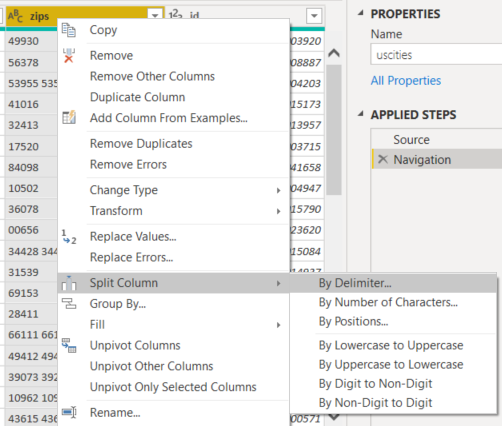

<b>In Split Column by Delimiter: Select Space , Expand Advance Option: Select Rows - OK</b><br>
Close & APply to go back to Power BI Desktop for visualizations

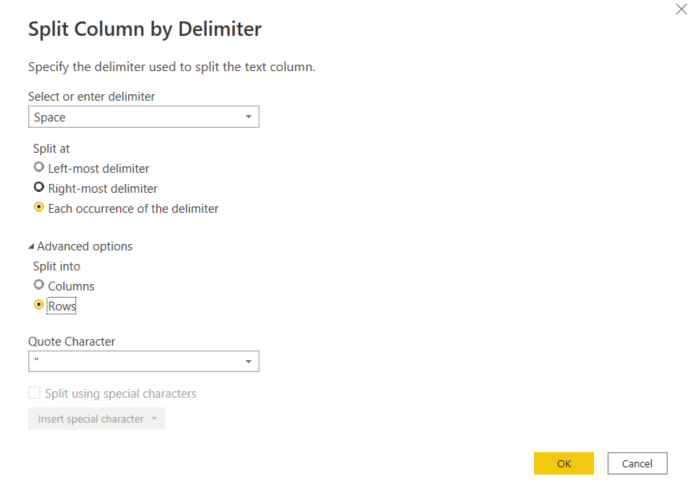

In [302]:
pip install powerbiclient